# Q1.

In [50]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K) # raw vector
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr
print("xt", x_train.shape)
print("yt", y_train.shape)

x_train:  (50000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)
xt (50000, 3072)
yt (50000, 10)


In [51]:
iterations = 300
lr = 1.4e-2
lr_decay= 0.999
reg = 5e-5
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    # Forward pass
    x = x_train[indices]
    y = y_train[indices]
    y_pred = x.dot(w1) + b1 
    loss = 1./batch_size*np.square(y_pred - y).sum() + reg*np.sum(w1*w1)
    loss_history.append(loss)

    if t % 10 == 0:
        print("Loss after {} iteration {}".format(t, loss))
        train_acc = 1.0 - (1/Ntr)*(np.count_nonzero(
            np.abs(np.argmax(y_pred, axis=1) - np.argmax(y, axis=1))))
        train_acc_history.append(train_acc)
        print("Training accuracy : ",train_acc)
    # Backward pass
    dy_pred = (2.0/batch_size)*(y_pred - y)
    dw1 = x.T.dot(dy_pred)  # D x K
    db1 = dy_pred.sum(axis=0) # 1 x K coloumn wise summation 

    w1 = w1 - lr*dw1
    b1 = b1 - lr*db1
    lr = lr*lr_decay 

Loss after 0 iteration 1.0000033149319185
Training accuracy :  0.08727999999999991
Loss after 10 iteration 0.8766369958835691
Training accuracy :  0.35431999999999997
Loss after 20 iteration 0.842541180456005
Training accuracy :  0.3726999999999999
Loss after 30 iteration 0.8236176177386241
Training accuracy :  0.3821
Loss after 40 iteration 0.8123905563762663
Training accuracy :  0.3882
Loss after 50 iteration 0.8054280377616356
Training accuracy :  0.39298
Loss after 60 iteration 0.800907856686909
Training accuracy :  0.39598
Loss after 70 iteration 0.7978237358938501
Training accuracy :  0.39879999999999993
Loss after 80 iteration 0.7956076325935931
Training accuracy :  0.4011199999999999
Loss after 90 iteration 0.7939328319321328
Training accuracy :  0.40284
Loss after 100 iteration 0.7926078155580837
Training accuracy :  0.4047799999999999
Loss after 110 iteration 0.7915179462431109
Training accuracy :  0.40593999999999997
Loss after 120 iteration 0.7905929512128891
Training accur

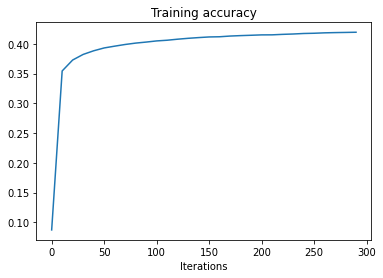

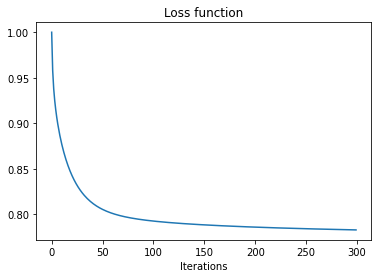

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

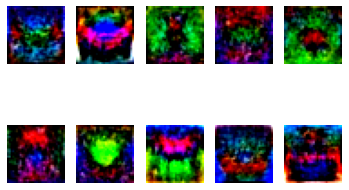

Training accuracy :  0.4194199999999999
Test accuracy :  0.40559999999999996


In [53]:
plt.plot(np.arange(0,300,10),train_acc_history)
plt.title("Training accuracy"), plt.xlabel("Iterations")
plt.show()
plt.plot(loss_history)
plt.title("Loss function"), plt.xlabel("Iterations")
plt.show()

fg, ax = plt.subplots(2,5)

for i in range(2):
    for j in range(5):
        img = w1[:,5*i+j].reshape(32,32,3)
        ax[i,j].imshow(img*250)
        ax[i,j].axis("off")
plt.show()

y_pred = x_train.dot(w1) + b1 
train_acc = 1.0 - (1/Ntr)*(np.count_nonzero(np.argmax(y_pred, axis=1) - np.argmax(y_train, axis=1)))
print("Training accuracy : ",train_acc)
y_pred_test = x_test.dot(w1) + b1 
test_acc = 1.0 - (1/Nte)*(np.count_nonzero(np.argmax(y_pred_test, axis=1) - np.argmax(y_test, axis=1)))
print("Test accuracy : ",test_acc)

# Q2.

In [54]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print("xt", x_train.shape)
print("yt", y_train.shape)

x_train:  (50000, 32, 32, 3)
xt (50000, 3072)
yt (50000, 10)


In [55]:
H = 200
std = 1e-5
w1 = std*np.random.randn(Din, H)
b1 = np.zeros(H) # raw vector
w2 = std*np.random.randn(H,K)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = Ntr

iterations = 300
lr = 1.4e-2
lr_decay= 0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    #indices = np.random.choice(Ntr, batch_size)
    # Forward pass
    x = x_train[indices]
    y = y_train[indices]
    h = 1./(1.0 + np.exp(-x.dot(w1) - b1))
    y_pred = h.dot(w2) + b2
    loss = 1./batch_size*np.square(y_pred - y).sum() + reg*(np.sum(w1*w1) + np.sum(w2*w2))
    loss_history.append(loss)

    if t % 10 == 0:
        print("Loss after {} iteration {}".format(t, loss))
        train_acc = 1.0 - (1/Ntr)*(np.count_nonzero(np.argmax(y_pred, axis=1) - np.argmax(y, axis=1)))
        train_acc_history.append(train_acc)
        print("Training accuracy : ",train_acc)
    # Backward pass
    dy_pred = (2.0/batch_size)*(y_pred - y)
    dw2 = h.T.dot(dy_pred) +  reg*w2 # H x K
    db2 = dy_pred.sum(axis=0) # 1 x K, coloumn wise summation 
    dh = dy_pred.dot(w2.T) # Ntr x H
    dw1 = x.T.dot(dh*h*(1-h)) + reg*w1
    db1 = (dh*h*(1-h)).sum(axis = 0)

    w1 = w1 - lr*dw1
    b1 = b1 - lr*db1
    w2 = w2 - lr*dw2
    b2 = b2 - lr*db2
    
    lr = lr*lr_decay

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
Loss after 0 iteration 0.9999959331690385
Training accuracy :  0.09999999999999998
Loss after 10 iteration 0.8682573371361504
Training accuracy :  0.2122799999999999
Loss after 20 iteration 0.8407834357105525
Training accuracy :  0.2760999999999999
Loss after 30 iteration 0.8280433874959806
Training accuracy :  0.3128399999999999
Loss after 40 iteration 0.82911444704228
Training accuracy :  0.31865999999999994
Loss after 50 iteration 0.8303673584542256
Training accuracy :  0.30933999999999995
Loss after 60 iteration 0.8076671802893323
Training accuracy :  0.35431999999999997
Loss after 70 iteration 0.7981704816325221
Training accuracy :  0.3732399999999999
Loss after 80 iteration 0.7897297698394267
Training accuracy :  0.38064
Loss after 90 iteration 0.7886080601855566
Training accuracy :  0.3904399999999999
Loss after 100 iteration 0.7816903904276186
Training accuracy :  0.39842
Loss after 110 iteration 0.7766190563589677
Training acc

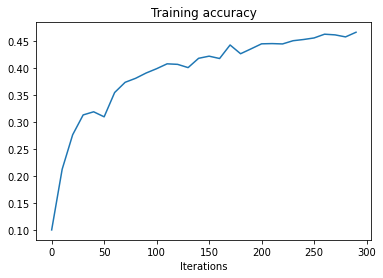

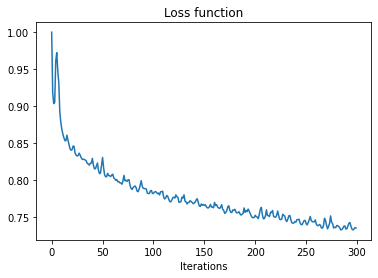

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

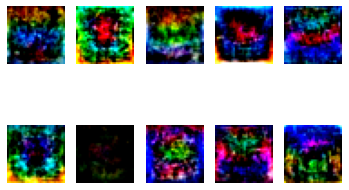

Training accuracy :  0.46824
Test accuracy :  0.40559999999999996


In [60]:
plt.plot(np.arange(0,300,10),train_acc_history)
plt.title("Training accuracy"), plt.xlabel("Iterations")
plt.show()
plt.plot(loss_history)
plt.title("Loss function"), plt.xlabel("Iterations")
plt.show()

fg, ax = plt.subplots(2,5)

for i in range(2):
    for j in range(5):
        img = w1[:,5*i+j].reshape(32,32,3)
        ax[i,j].imshow(img*1000)
        ax[i,j].axis("off")
plt.show()

h = 1./(1 + np.exp(-x_train.dot(w1) - b1))
y_pred = h.dot(w2) + b2
train_acc = 1.0 - (1/Ntr)*(np.count_nonzero(np.argmax(y_pred, axis=1) - np.argmax(y_train, axis=1)))
print("Training accuracy : ",train_acc)
h_1 = 1./(1 + np.exp(-x_test.dot(w1) - b1))
y_pred_test = h_1.dot(w2) + b2
train_acc = 1.0 - (1/Nte)*(np.count_nonzero(np.argmax(y_pred_test, axis=1) - np.argmax(y_test, axis=1)))
print("Test accuracy : ",test_acc)

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
#x_train, x_test = x_train, x_test
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print("xt", x_train.shape)
print("yt", y_train.shape)

x_train:  (50000, 32, 32, 3)
xt (50000, 3072)
yt (50000, 10)


In [18]:
H = 200
std = 1e-5
w1 = std*np.random.randn(Din, H)
b1 = np.zeros(H) # raw vector
w2 = std*np.random.randn(H,K)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = 500

iterations = 300
lr = 0.001
lr_decay= 0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    seed += 1
    loss_1 = []
    for st in range(0,Ntr+1, batch_size):
        # Forward pass
        end = st + batch_size
        x = x_train[st:end:,]
        y = y_train[st:end:,]

        z = x.dot(w1) + b1
        with np.errstate(over='ignore', invalid='ignore'):
              h = np.where(z >= 0,
                  1 / (1 + np.exp(-z)),
                  np.exp(z) / (1 + np.exp(z)))
        y_pred = h.dot(w2) + b2

        loss = 1./batch_size*np.square(y_pred - y).sum() + reg*(np.sum(w1*w1) + np.sum(w2*w2))
        loss_1.append(loss)
        
        # Backward pass
        dy_pred = (2.0/batch_size)*(y_pred - y)
        dw2 = h.T.dot(dy_pred) +  reg*w2 # H x K
        db2 = dy_pred.sum(axis=0) # 1 x K, coloumn wise summation 
        dh = dy_pred.dot(w2.T) # Ntr x H
        dw1 = x.T.dot(dh*h*(h-1)) + reg*w1
        db1 = (dh*h*(1-h)).sum(axis = 0)

        w1 = w1 - lr*dw1
        b1 = b1 - lr*db1
        w2 = w2 - lr*dw2
        b2 = b2 - lr*db2

    lr = lr*lr_decay
    loss_avg = np.average(loss_1)
    loss_history.append(loss_avg)
    if t % 10 == 0:
            print("Loss after {} iteration {}".format(t, loss_avg))



w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
Loss after 0 iteration 0.9215861215181524
Loss after 10 iteration 0.8962550519067443
Loss after 20 iteration 0.8911134120095059
Loss after 30 iteration 0.890976469150208
Loss after 40 iteration 0.8909795806494762
Loss after 50 iteration 0.8909968882202765
Loss after 60 iteration 0.8910407503211599
Loss after 70 iteration 0.8910771846507703
Loss after 80 iteration 0.8911001672890545
Loss after 90 iteration 0.8911162361589366
Loss after 100 iteration 0.8911287391139368
Loss after 110 iteration 0.8911387463910485
Loss after 120 iteration 0.8911468878557562
Loss after 130 iteration 0.8911536086638309
Loss after 140 iteration 0.8911591619871426
Loss after 150 iteration 0.8911638082801994
Loss after 160 iteration 0.8911677873845623
Loss after 170 iteration 0.8911713307075786
Loss after 180 iteration 0.891173131961059
Loss after 190 iteration 0.8911735914621042
Loss after 200 iteration 0.8911756997076234
Loss after 210 iteration 0.89117767229

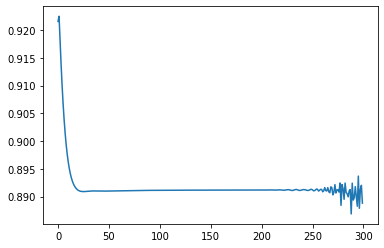

Training accuracy :  0.09415999999999991
Test accuracy :  0.10089999999999999


In [20]:
plt.plot(loss_history)
plt.show()


z = x_train.dot(w1) + b1
with np.errstate(over='ignore', invalid='ignore'):
      h = np.where(z >= 0,
                  1 / (1 + np.exp(-z)),
                  np.exp(z) / (1 + np.exp(z)))
y_pred = h.dot(w2) + b2
train_acc = 1.0 - (1/Ntr)*(np.count_nonzero(np.argmax(y_pred, axis=1) - np.argmax(y_train, axis=1)))
print("Training accuracy : ",train_acc)

z1 = x_test.dot(w1) + b1
with np.errstate(over='ignore', invalid='ignore'):
      h = np.where(z1 >= 0,
                  1 / (1 + np.exp(-z1)),
                  np.exp(z1) / (1 + np.exp(z1)))
y_pred_test = h.dot(w2) + b2

test_acc = 1.0 - (1/Nte)*(np.count_nonzero(np.argmax(y_pred_test, axis=1) - np.argmax(y_test, axis=1)))
print("Test accuracy : ",test_acc)

In [ ]:

%matplotlib inline 
%load_ext tensorboard
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime
import numpy as np 
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = tf.dtypes.cast(x_train, tf.float32)
x_test = tf.dtypes.cast(x_test, tf.float32)
#x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0
x_train, x_test = x_train/255., x_test/255.

model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(10))

model.compile(
    optimizer = tf.keras.optimizers.SGD(momentum = 0.9),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
    metrics= ["accuracy"]
)
print(model.summary())


model.fit(x_train, y_train, epochs = 5, batch_size = 50)

test_loss, test_acc = model.evaluate(x_test, y_test, batch_size = 50,verbose = 2)
print("\nTest accuracy = ", test_acc)


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 2, 2, 64)          0         
______________________________